## Imports

In [ ]:
import numpy as np
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from patchify import *

%load_ext autoreload
%autoreload 2

In [2]:
scale = 10               # downscale factor for faster processing
patch_size = 2048       # size of the obtained patches
overlap = 256           # approximate overlap for the adaptive sampling, exact overlap for the regular grid

compactness = 0.4       # SLIC parameter on the "spread" of the clusters
multichannel = False    # if True using the color values, if False processing on grayscale image
min_size_factor = 0.1
max_size_factor = 2.5

debug = False            # debug = saving output image of intermediary steps
linewidth = 30          # display
color = (0,0,0)         # display

## Load Image
WSI from The Early **B**reast **C**ancer Core-**N**eedle **B**iopsy WSI (BCNB) Dataset, freely available at <https://bupt-ai-cz.github.io/BCNB/>

In [3]:
img_id = '280'
img_path = '{}.jpg'.format(img_id)
img = Image.open(img_path)
img = np.array(img)
print(img.shape)

(14208, 18080, 3)


Text(0.5, 0.98, 'Image')

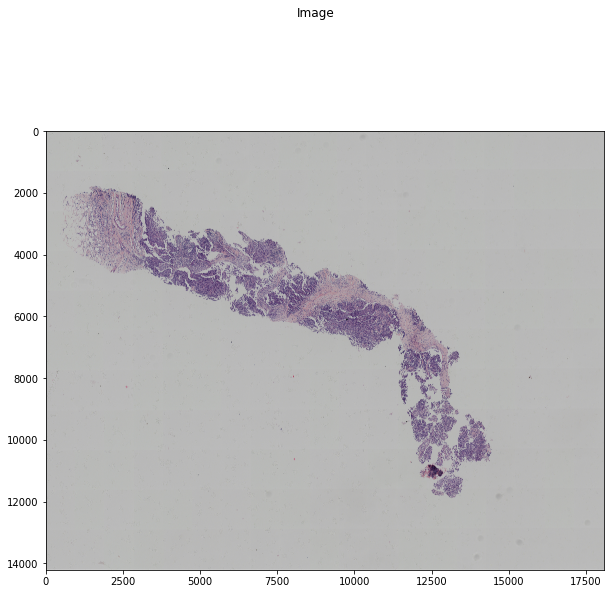

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.suptitle("Image")

## 1. Regular Grid Sampling

In [5]:
%%time
patches_list, centers_list = patchify(img, patch_size=patch_size, overlap=overlap, remove_background=True, background_is='light')

CPU times: total: 625 ms
Wall time: 672 ms


uint8 2 255


Text(0.5, 0.98, 'Regular Grid Patchification')

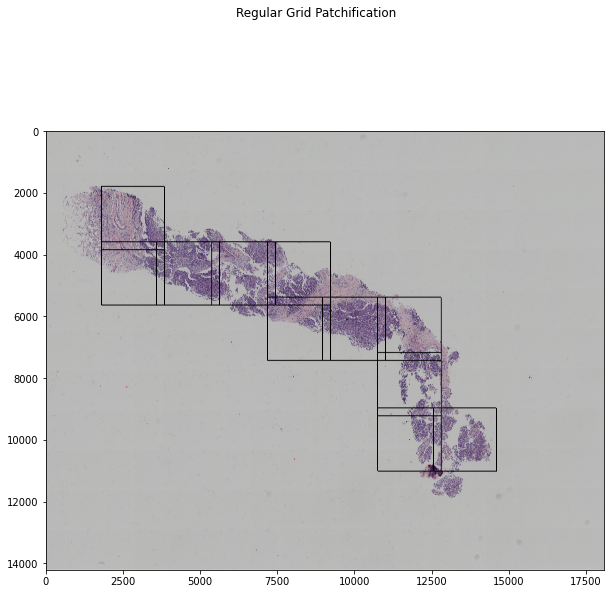

In [6]:
img_with_grid = draw_markers(centers_list, patch_size, img, filename='{}_regular_grid_markers.jpg'.format(img_id), on_image=True, linewidth=linewidth, color=color)

plt.figure(figsize=(10,10))
plt.imshow(img_with_grid)
plt.suptitle("Regular Grid Patchification")

## 2. Sleek sampling

In [7]:
%%time
patches_list, centers_list = slic_patchify(img, patch_size=patch_size, overlap=overlap, mask=None,
            scale=scale, remove_background=True, background_is='light',
            min_size_factor=min_size_factor, max_size_factor=max_size_factor,
            compactness=compactness, multichannel=multichannel, logdir="./", debug=debug)

Running slic (patch size = 1792 => number of segments = 79) on rescaled image : scale = 10, image size 1421x1808
(1421, 1808)
float64 0.45942935324128353 0.7290971487948652
background thresh =  0.6221780814171756
CPU times: total: 1min
Wall time: 1min


uint8 2 255


Text(0.5, 0.98, 'Sleek Patchification')

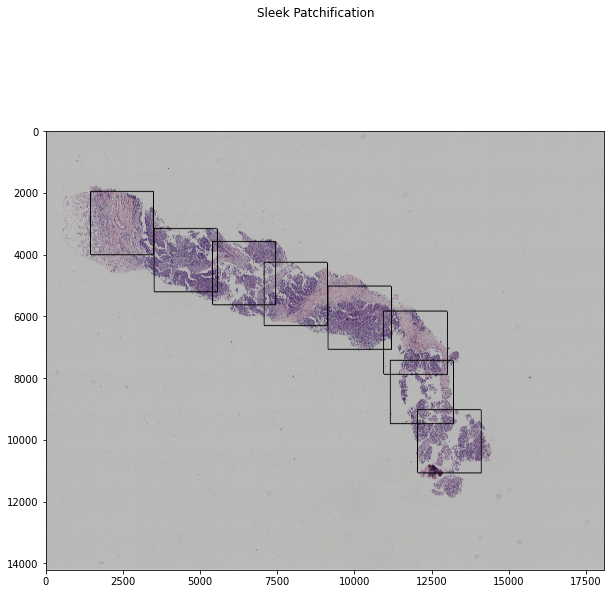

In [8]:
img_with_grid = draw_markers(centers_list, patch_size, img, filename='{}_sleek_markers.jpg'.format(img_id), on_image=True, linewidth=linewidth, color=color)

plt.figure(figsize=(10,10))
plt.imshow(img_with_grid)
plt.suptitle("Sleek Patchification")

## 3. Sleek sampling with mask
here the mask corresponds to the **foreground segmentation**, but it can be used with **ground truth class segmentations**

Text(0.5, 0.98, 'Image Mask')

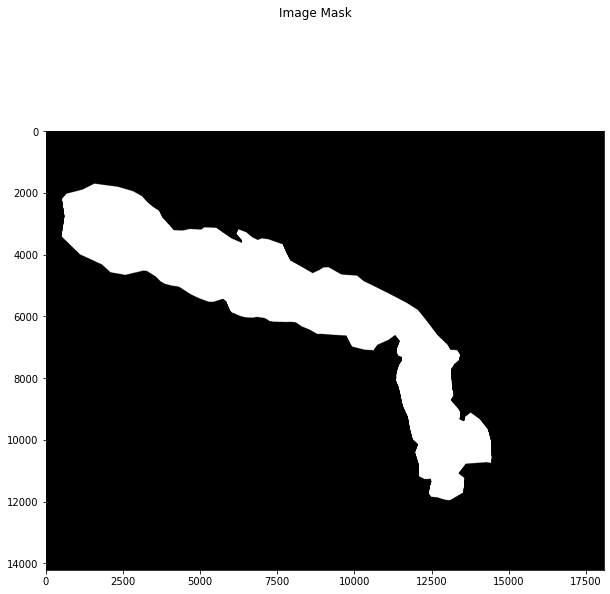

In [9]:
mask = Image.open("{}_mask.jpg".format(img_id))
mask = np.array(mask)
mask = mask.astype('bool')

plt.figure(figsize=(10,10))
plt.imshow(mask, cmap='gray')
plt.suptitle("Image Mask")

In [10]:
%%time
patches_list, centers_list = slic_patchify(img, patch_size=patch_size, overlap=overlap, mask=mask,
            scale=scale, remove_background=False,
            min_size_factor=min_size_factor, max_size_factor=max_size_factor,
            compactness=compactness, multichannel=multichannel, logdir="./", debug=debug)

Running slic (patch size = 1792 => number of segments = 10) on rescaled image : scale = 10, image size 1421x1808
(1421, 1808)
CPU times: total: 59.4 s
Wall time: 59.2 s


uint8 2 255


Text(0.5, 0.98, 'Masked Sleek Patchification')

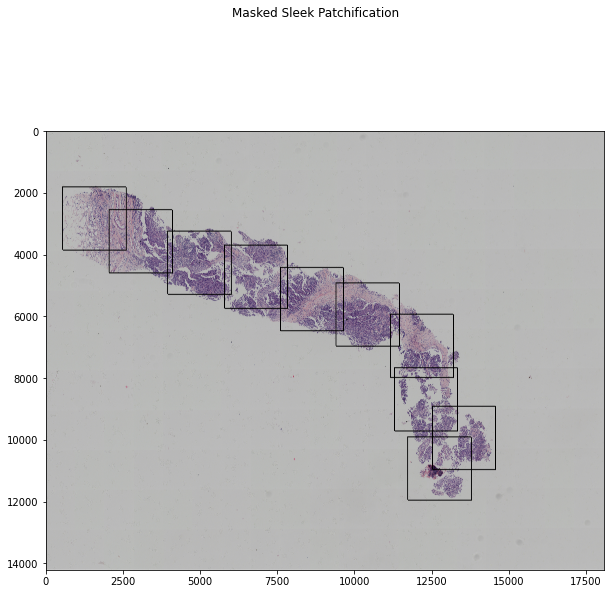

In [11]:
img_with_grid = draw_markers(centers_list, patch_size, img, filename='{}_masked_sleek_markers.jpg'.format(img_id), on_image=True, linewidth=linewidth, color=color)

plt.figure(figsize=(10,10))
plt.imshow(img_with_grid)
plt.suptitle("Masked Sleek Patchification")